In [1]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [2]:
aapl_df = yf.download('AAPL')

[*********************100%***********************]  1 of 1 completed


In [7]:
aapl_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-04-26,34.100692,34.131379,33.843410,33.914219,80164800,0.0,0.0
2017-04-27,33.970883,34.027534,33.826899,33.940197,56985200,0.0,0.0
2017-04-28,34.011005,34.060575,33.817454,33.907146,83441600,0.0,0.0
2017-05-01,34.249413,34.745095,34.216367,34.598751,134411600,0.0,0.0
2017-05-02,34.825341,34.955164,34.660114,34.818260,181408800,0.0,0.0
...,...,...,...,...,...,...,...
2022-04-19,165.020004,167.820007,163.910004,167.399994,67723800,0.0,0.0
2022-04-20,168.759995,168.880005,166.100006,167.229996,67929800,0.0,0.0
2022-04-21,168.910004,171.529999,165.910004,166.419998,87227800,0.0,0.0


In [9]:
import yfinance as yf
stock_info = yf.Ticker('TSLA').info
# stock_info.keys() for other properties you can explore
market_price = stock_info['regularMarketPrice']
previous_close_price = stock_info['regularMarketPreviousClose']
print('market price ', market_price)
print('previous close price ', previous_close_price)

market price  998.02
previous close price  1005.05


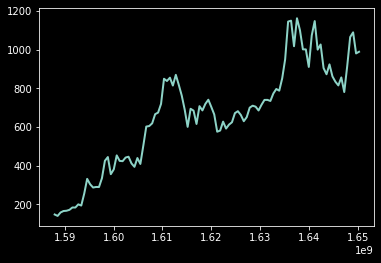

In [10]:
import yfinance as yf
import pendulum
import matplotlib.pyplot as plt
price_history = yf.Ticker('TSLA').history(period='2y', # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
                                   interval='1wk', # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
                                   actions=False)
time_series = list(price_history['Open'])
dt_list = [pendulum.parse(str(dt)).float_timestamp for dt in list(price_history.index)]
plt.style.use('dark_background')
plt.plot(dt_list, time_series, linewidth=2)

In [13]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

# show actions (dividends, splits)
msft.actions

# show dividends
msft.dividends

# show splits
msft.splits

# show financials
msft.financials
msft.quarterly_financials

# show major holders
msft.major_holders

# show institutional holders
msft.institutional_holders

# show balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet

# show cashflow
msft.cashflow
msft.quarterly_cashflow

# show earnings
msft.earnings
msft.quarterly_earnings

# show sustainability
msft.sustainability

# show analysts recommendations
msft.recommendations

# show next event (earnings, etc)
msft.calendar

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# show news
msft.news

[{'uuid': '89595aad-b799-3398-9337-ef1166ec0112',
  'title': 'Dow Jones Gains As Tech Stocks Fight; Twitter Gains As Elon Musk Takes Control; Donald Trump SPAC Craters',
  'publisher': "Investor's Business Daily",
  'link': 'https://finance.yahoo.com/m/89595aad-b799-3398-9337-ef1166ec0112/dow-jones-gains-as-tech.html',
  'providerPublishTime': 1650915121,
  'type': 'STORY'},
 {'uuid': '865263b4-b1ef-3b0a-8bfc-4c3cda1089da',
  'title': 'Is Snowflake Stock A Buy Or Sell Amid Software Sector Volatility?',
  'publisher': "Investor's Business Daily",
  'link': 'https://finance.yahoo.com/m/865263b4-b1ef-3b0a-8bfc-4c3cda1089da/is-snowflake-stock-a-buy-or.html',
  'providerPublishTime': 1650909947,
  'type': 'STORY'},
 {'uuid': 'd8fe16de-dd8b-357a-bd18-4f46639010b6',
  'title': "Is Microsoft Stock A Buy Before Software Giant's March-Quarter Report?",
  'publisher': "Investor's Business Daily",
  'link': 'https://finance.yahoo.com/m/d8fe16de-dd8b-357a-bd18-4f46639010b6/is-microsoft-stock-a-buy.

In [3]:
def get_headers():
    return {"accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
            "accept-encoding": "gzip, deflate, br",
            "accept-language": "en-GB,en;q=0.9,en-US;q=0.8,ml;q=0.7",
            "cache-control": "max-age=0",
            "dnt": "1",
            "sec-fetch-dest": "document",
            "sec-fetch-mode": "navigate",
            "sec-fetch-site": "none",
            "sec-fetch-user": "?1",
            "upgrade-insecure-requests": "1",
            "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.122 Safari/537.36"}


In [9]:
from lxml import html
import requests
import json
import argparse
from collections import OrderedDict

In [31]:
def parse(ticker):
    url = "http://finance.yahoo.com/quote/%s?p=%s" % (ticker, ticker)
    response = requests.get(
        url, verify=False, headers=get_headers(), timeout=30)
    print(response.status_code)
    print("Parsing %s" % (url))
    parser = html.fromstring(response.text)
    summary_table = parser.xpath(
        '//div[contains(@data-test,"summary-table")]//tr')
    summary_data = OrderedDict()
    other_details_json_link = "https://query2.finance.yahoo.com/v10/finance/quoteSummary/AAPL?formatted=true&lang=en-US&region=US&modules=summaryProfile%2CfinancialData%2CrecommendationTrend%2CupgradeDowngradeHistory%2Cearnings%2CdefaultKeyStatistics%2CcalendarEvents&corsDomain=finance.yahoo.com".format(
        ticker)
    summary_json_response = requests.get(other_details_json_link)
    print(summary_json_response.status_code)
    try:
        print(summary_json_response.text)
        json_loaded_summary = json.loads(summary_json_response.text)
        summary = json_loaded_summary["quoteSummary"]["result"][0]
        y_Target_Est = summary["financialData"]["targetMeanPrice"]['raw']
        earnings_list = summary["calendarEvents"]['earnings']
        eps = summary["defaultKeyStatistics"]["trailingEps"]['raw']
        datelist = []

        for i in earnings_list['earningsDate']:
            datelist.append(i['fmt'])
        earnings_date = ' to '.join(datelist)

        for table_data in summary_table:
            raw_table_key = table_data.xpath(
                './/td[1]//text()')
            raw_table_value = table_data.xpath(
                './/td[2]//text()')
            table_key = ''.join(raw_table_key).strip()
            table_value = ''.join(raw_table_value).strip()
            summary_data.update({table_key: table_value})
        summary_data.update({'1y Target Est': y_Target_Est, 'EPS (TTM)': eps,
                             'Earnings Date': earnings_date, 'ticker': ticker,
                             'url': url})
        return summary_data
    except ValueError as e:
        print(e)
        print("Failed to parse json response")
        return {"error": "Failed to parse json response"}
    except:
        return {"error": "Unhandled Error"}

In [32]:
parse('UPST')

c:\Users\Shubhendu\AppData\Local\Programs\Python\Python39\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'finance.yahoo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


200
Parsing http://finance.yahoo.com/quote/UPST?p=UPST
403
Forbidden
Expecting value: line 1 column 1 (char 0)
Failed to parse json response


{'error': 'Failed to parse json response'}